In [1]:
import json
import codecs
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
with codecs.open('AQI1.json', 'r', encoding='utf-8') as file:
    content_json = file.read()
    
content = json.loads(content_json)
content

[{'sitename': '基隆',
  'county': '基隆市',
  'aqi': '39',
  'pollutant': '',
  'status': '良好',
  'so2': '1.3',
  'co': '0.25',
  'o3': '39.8',
  'o3_8hr': '42.2',
  'pm10': '21',
  'pm2.5': '8',
  'no2': '6.2',
  'nox': '7.5',
  'no': '1.3',
  'wind_speed': '0.9',
  'wind_direc': '66',
  'publishtime': '2022/12/08 10:00:00',
  'co_8hr': '0.2',
  'pm2.5_avg': '6',
  'pm10_avg': '15',
  'so2_avg': '0',
  'longitude': '121.760056',
  'latitude': '25.129167',
  'siteid': '1'},
 {'sitename': '汐止',
  'county': '新北市',
  'aqi': '31',
  'pollutant': '',
  'status': '良好',
  'so2': '0.2',
  'co': '0.27',
  'o3': '33.3',
  'o3_8hr': '33.8',
  'pm10': '4',
  'pm2.5': '7',
  'no2': '13.2',
  'nox': '15.2',
  'no': '1.9',
  'wind_speed': '2',
  'wind_direc': '48',
  'publishtime': '2022/12/08 10:00:00',
  'co_8hr': '0.2',
  'pm2.5_avg': '4',
  'pm10_avg': '7',
  'so2_avg': '0',
  'longitude': '121.6423',
  'latitude': '25.067131',
  'siteid': '2'},
 {'sitename': '萬里',
  'county': '新北市',
  'aqi': '42',
  

## 1.建立 ipython 介面，以下拉式選單選擇縣市(county)之後列出該縣市所有測站於另一個下拉式選單 ##
### 例如選擇"臺北市"，應該會出現七個測站[中山、古亭、萬華...  等] ###

In [3]:
# TODO: Pandas DataFrame
df = pd.DataFrame(content)
df['county'] = df['county'].astype('category')
df['sitename'] = df['sitename'].astype('category')
df['aqi'] = df['aqi'].astype('float64') # 將aqi轉換為小數
df

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,基隆,基隆市,39.0,,良好,1.3,0.25,39.8,42.2,21,...,0.9,66,2022/12/08 10:00:00,0.2,6,15,0,121.760056,25.129167,1
1,汐止,新北市,31.0,,良好,0.2,0.27,33.3,33.8,4,...,2,48,2022/12/08 10:00:00,0.2,4,7,0,121.6423,25.067131,2
2,萬里,新北市,42.0,,良好,0.4,0.19,45.8,45.6,45,...,5.1,19,2022/12/08 10:00:00,0.1,10,35,0,121.689881,25.179667,3
3,新店,新北市,28.0,,良好,0.7,0.38,27.2,28.9,7,...,0.9,115,2022/12/08 10:00:00,0.2,3,6,0,121.537778,24.977222,4
4,土城,新北市,31.0,,良好,0.8,0.35,28.9,33.3,10,...,1.5,66,2022/12/08 10:00:00,0.2,2,8,0,121.451861,24.982528,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,屏東(琉球),屏東縣,84.0,細懸浮微粒,普通,2.7,0.4,29.7,10.3,49,...,1.3,334,2022/12/08 10:00:00,0.4,28,50,3,120.37722,22.35222,204
81,宜蘭(壯圍),宜蘭縣,29.0,,良好,0.4,0.28,23.5,31.7,9,...,0.3,94,2022/12/08 10:00:00,0.2,6,16,0,121.815708,24.765468,310
82,新北(樹林),新北市,32.0,,良好,0.5,0.37,21.4,21.8,12,...,0,171,2022/12/08 10:00:00,0.2,6,10,0,121.38352778,24.94902778,311
83,臺南(學甲),臺南市,34.0,,良好,0.9,0.3,24.5,21,44,...,2.7,23,2022/12/08 10:00:00,0.2,10,28,0,120.18339722,23.23688056,312


In [4]:
# TODO: 先確認有哪些county
df['county'].cat.categories

Index(['南投縣', '嘉義市', '嘉義縣', '基隆市', '宜蘭縣', '屏東縣', '彰化縣', '新北市', '新竹市', '新竹縣',
       '桃園市', '澎湖縣', '臺中市', '臺北市', '臺南市', '臺東縣', '花蓮縣', '苗栗縣', '連江縣', '金門縣',
       '雲林縣', '高雄市'],
      dtype='object')

In [5]:
# Pandas DataFrame Filter
df[df['county'] == '臺北市']

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
10,士林,臺北市,38.0,,良好,0.8,0.37,18.4,21.4,23,...,1.1,258,2022/12/08 10:00:00,0.3,5,12,0,121.51666356,25.10334003,11
11,中山,臺北市,42.0,,良好,1,0.61,18.8,24.2,15,...,2.4,118,2022/12/08 10:00:00,0.4,4,9,0,121.526528,25.062361,12
12,萬華,臺北市,47.0,,良好,0.7,0.52,15.1,20.1,15,...,2.4,102,2022/12/08 10:00:00,0.3,7,8,0,121.507972,25.046503,13
13,古亭,臺北市,30.0,,良好,0.3,0.38,25.4,32.2,9,...,1.8,58,2022/12/08 10:00:00,0.2,8,8,0,121.529556,25.020608,14
14,松山,臺北市,37.0,,良好,0.8,0.37,22.8,29.6,16,...,2.6,62,2022/12/08 10:00:00,0.2,6,13,0,121.578611,25.05,15
15,大同,臺北市,55.0,二氧化氮,普通,0.8,1.13,9.4,13.1,25,...,-,-,2022/12/08 10:00:00,1,11,22,0,121.51342074,25.06331455,16
62,陽明,臺北市,41.0,,良好,1.3,0.21,44.9,44.1,3,...,,,2022/12/08 10:00:00,0.1,0,4,0,121.529583,25.182722,64


## 2.選擇測站之後列出該測站的任意五個屬性(自選) ##

In [6]:
df_sitename_filtered = df[df['county'] == '臺北市'][df['sitename'] == '中山']
print(f"status:{df_sitename_filtered['status']}")
print(f"co:{df_sitename_filtered['co']}")
print(f"pm2.5:{df_sitename_filtered['pm2.5']}")
print(f"so2:{df_sitename_filtered['so2']}")
print(f"no2:{df_sitename_filtered['no2']}")

status:11    良好
Name: status, dtype: object
co:11    0.61
Name: co, dtype: object
pm2.5:11    5
Name: pm2.5, dtype: object
so2:11    1
Name: so2, dtype: object
no2:11    25.5
Name: no2, dtype: object


C:\Users\Ace\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## 3.顯示本日全台灣 AQI 前五糟糕的測站 (使用 pandas，以 aqi 排序之後顯示 SiteName 欄位) ##
### AQI空氣品質指標，數值越大，代表空氣汙染狀況越嚴重，對人體的健康危害也就越大。 ###

In [7]:
df.sort_values(by='aqi', ascending=False)[0:5]['sitename']

80    屏東(琉球)
49        鳳山
55        前鎮
56        小港
50        大寮
Name: sitename, dtype: category
Categories (85, object): [三義, 三重, 中壢, 中山, ..., 高雄(湖內), 鳳山, 麥寮, 龍潭]

## 4.顯示本日全台灣 平均 AQI 前五糟糕的縣市 (使用 pandas，先計算各縣市的平均 AQI，再顯示 County 欄位) ##

In [8]:
df_AQI_Averages = pd.DataFrame(df['county'].cat.categories, columns=['各縣市']) 

# 計算各縣市的平均 AQI
Calculate_SiteNames = list()
Calculate_Sum_AQI = list()
Calculate_Average_AQI = list()
for county in df['county'].cat.categories:
    Calculate_SiteNames.append(df[df['county'] == county].shape[0])
    Calculate_Sum_AQI.append(df[df['county'] == county].sum()['aqi'])
    Calculate_Average_AQI.append(df[df['county'] == county].sum()['aqi']/df[df['county'] == county].shape[0])
    
df_AQI_Averages['測站數量']=Calculate_SiteNames
df_AQI_Averages['總計AQI']=Calculate_Sum_AQI
df_AQI_Averages['平均AQI']=Calculate_Average_AQI
df_AQI_Averages.sort_values(by='平均AQI', ascending=False)[0:5]['各縣市']


21    高雄市
19    金門縣
18    連江縣
5     屏東縣
10    桃園市
Name: 各縣市, dtype: object

## 5. 選用matplotlib ##
## 6. 選擇縣市之後，把該縣市所有測站的 AQI 以長條圖顯示出來 ##

In [9]:
# 以'臺北市'為例，畫出所有測站的 AQI 
df_sitename_filtered = df[df['county'] == '臺北市']
df_sitename_filtered

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
10,士林,臺北市,38.0,,良好,0.8,0.37,18.4,21.4,23,...,1.1,258,2022/12/08 10:00:00,0.3,5,12,0,121.51666356,25.10334003,11
11,中山,臺北市,42.0,,良好,1,0.61,18.8,24.2,15,...,2.4,118,2022/12/08 10:00:00,0.4,4,9,0,121.526528,25.062361,12
12,萬華,臺北市,47.0,,良好,0.7,0.52,15.1,20.1,15,...,2.4,102,2022/12/08 10:00:00,0.3,7,8,0,121.507972,25.046503,13
13,古亭,臺北市,30.0,,良好,0.3,0.38,25.4,32.2,9,...,1.8,58,2022/12/08 10:00:00,0.2,8,8,0,121.529556,25.020608,14
14,松山,臺北市,37.0,,良好,0.8,0.37,22.8,29.6,16,...,2.6,62,2022/12/08 10:00:00,0.2,6,13,0,121.578611,25.05,15
15,大同,臺北市,55.0,二氧化氮,普通,0.8,1.13,9.4,13.1,25,...,-,-,2022/12/08 10:00:00,1,11,22,0,121.51342074,25.06331455,16
62,陽明,臺北市,41.0,,良好,1.3,0.21,44.9,44.1,3,...,,,2022/12/08 10:00:00,0.1,0,4,0,121.529583,25.182722,64


In [10]:
# 因為matplotlib不接受中文，所以要轉為英文。
sitename_english = {'士林':'Shilin', '中山':'zhongshan', '萬華':'Wanhua', '古亭':'Guting', '松山':'Songshan', '大同':'Datong', '陽明':'YangMing'}
df_sitename_filtered["sitename"] = df_sitename_filtered["sitename"].replace(sitename_english)
df_sitename_filtered

C:\Users\Ace\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
10,Shilin,臺北市,38.0,,良好,0.8,0.37,18.4,21.4,23,...,1.1,258,2022/12/08 10:00:00,0.3,5,12,0,121.51666356,25.10334003,11
11,zhongshan,臺北市,42.0,,良好,1,0.61,18.8,24.2,15,...,2.4,118,2022/12/08 10:00:00,0.4,4,9,0,121.526528,25.062361,12
12,Wanhua,臺北市,47.0,,良好,0.7,0.52,15.1,20.1,15,...,2.4,102,2022/12/08 10:00:00,0.3,7,8,0,121.507972,25.046503,13
13,Guting,臺北市,30.0,,良好,0.3,0.38,25.4,32.2,9,...,1.8,58,2022/12/08 10:00:00,0.2,8,8,0,121.529556,25.020608,14
14,Songshan,臺北市,37.0,,良好,0.8,0.37,22.8,29.6,16,...,2.6,62,2022/12/08 10:00:00,0.2,6,13,0,121.578611,25.05,15
15,Datong,臺北市,55.0,二氧化氮,普通,0.8,1.13,9.4,13.1,25,...,-,-,2022/12/08 10:00:00,1,11,22,0,121.51342074,25.06331455,16
62,YangMing,臺北市,41.0,,良好,1.3,0.21,44.9,44.1,3,...,,,2022/12/08 10:00:00,0.1,0,4,0,121.529583,25.182722,64


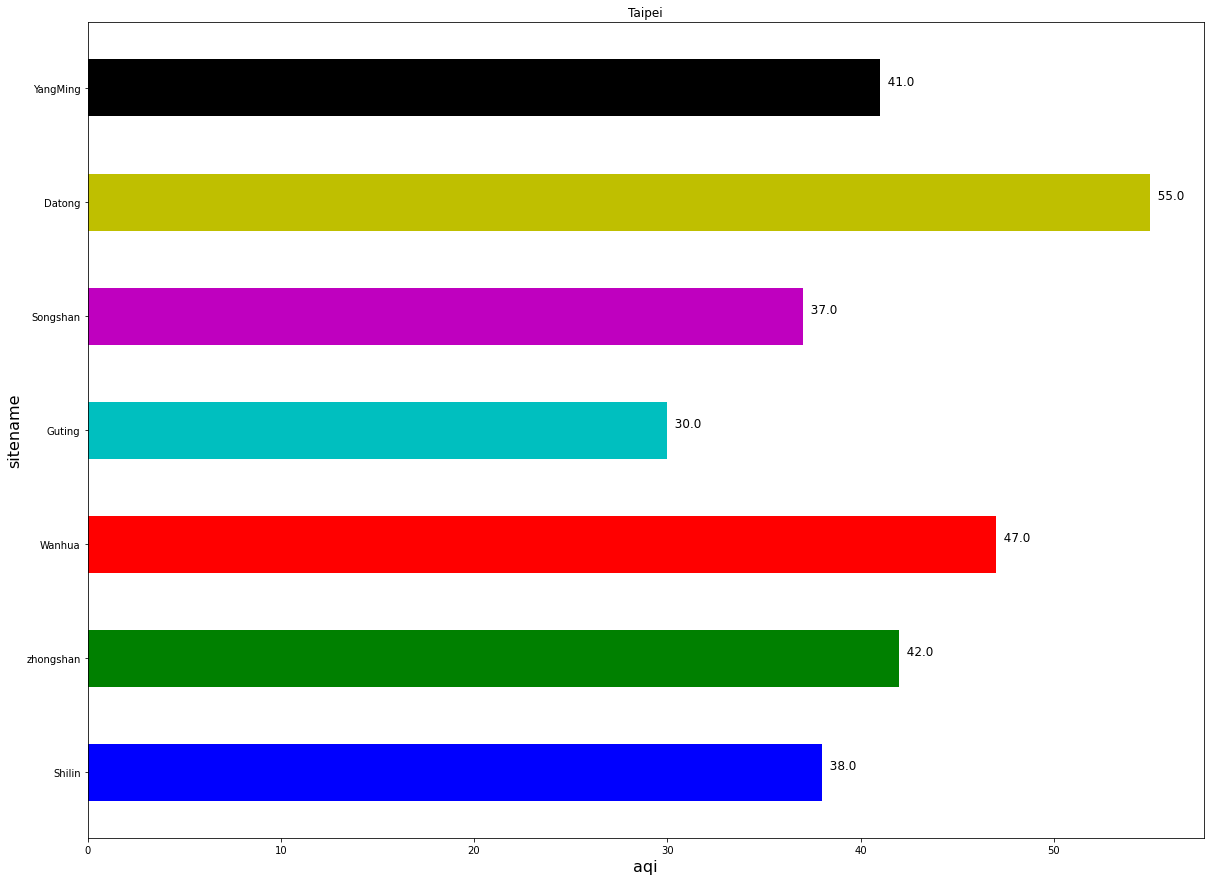

In [11]:
plt.figure(figsize=(20, 15))
plt.xlabel("aqi", fontsize=16)
plt.ylabel("sitename", fontsize=16)
plt.title("Taipei")
plt.barh(df_sitename_filtered["sitename"], df_sitename_filtered["aqi"], color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'], height=0.5)
for a,b in zip(df_sitename_filtered["aqi"], df_sitename_filtered["sitename"]): plt.text(a,b, '  '+str(a), ha='left', va='bottom', fontsize=12) # 顯示數據標籤